<a href="https://colab.research.google.com/github/hermannvargens/hermannvargens.github.io/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Índice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>

<li><a href = 'https://#introducao'>Introdução</a>
<li><a href = 'https://#coleta'>Coleta e descrição dos dados</a>
<li><a href = 'https://#amostragem'>Amostragem</a>
<li><a href = 'https://#eda'>Análise Exploratória dos Dados</a>
<li><a href = 'https://#modelagem'>Modelagem</a>
<li><a href = 'https://#avaliacao'>Avaliação no conjunto de testes</a>
<li><a href = 'https://#conclusao'>Conclusão</a>
<li><a href = 'https://#apendice_A'>Apẽndice A</a>
<li><a href = 'https://#apendice_B'>Apẽndice B</a>


#<h1 id="introducao">1 Introdução</h1>

Este projeto tem como objetivo analisar um dataset de preços de casas da Califórnia, nos anos 1990, e apresentar um modelo de previsão para os valores médios das casas.

#<h1 id="coelta">2 Coleta e descrição do dados</h1>

In [ ]:
#Para cálculos e dataframe
import pandas as pd
import numpy as np

#Para criação de gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#Para obter uma amostra estratificada, baseada na coluna income_cat
from sklearn.model_selection import StratifiedShuffleSplit

#Para substituir os valores ausentes
from sklearn.impute import SimpleImputer

#para transformar variáveis categóricas em numéricas
from sklearn.preprocessing import OneHotEncoder

#PAra criar pipelines
from sklearn.pipeline import Pipeline

#Para criar pipelines de pré-processamento

from sklearn.compose import ColumnTransformer

#Para realizar validação cruzada

from sklearn.model_selection import cross_val_score

#Para normalizar os dados

from sklearn.preprocessing import StandardScaler

#Para buscar uma melhor avaliação do modelo

from sklearn.model_selection import GridSearchCV

#Para avaliar o erro 

from sklearn.metrics import mean_squared_error

Dados obtidos de: https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Projetos/Datasets/housing/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Cada linha representa um bairro da California.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Dataset composto de 9 variáveis numéricas e 1 variável categórica:**

**Numéricas:**

* *longitude*: longitude da localização da região  
* *latitude*: latitude da localização da região  
* *housing_median_age*: idade média dos imóveis da região  
* *total_rooms*: quantidade total de cômodos na região  
* *total_bedrooms*: quantidade total de quartos na região  
* *population*: população da região  
* *households*: quantidade de domicílios na região  
* *median_income*: renda média na região  
* *median_house_value*:preço média da casa na região

**Categórica**

* *ocean_proximity*: proximidade do oceano


In [ ]:
data.isnull().sum()/data.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

**Apenas 1% dos dados faltantes na coluna 'total_bedrooms'**

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Há 5 categorias na coluna 'ocean_proximity'**

# <h1 id='amostragem'> 3 Amostragem </h1>

## 3.1 Correlação

Vamos verificar se há alguma correlação forte de alguma variável e a variável target ('median_house_value'), a qual pode ser interessante observar se sua distribuição é normal.

In [ ]:
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Vemos que as colunas 'median_income', 'total_rooms', 'housing_median_age', 'households' e 'latitude', possuem a correlação linear mais forte. Vamos então ver de como elas se distribuem num gráfico de frequência, e sua relação com a variável target ('median_house_value')

In [ ]:
'''strong_corr = ['median_income', 'total_rooms', 'housing_median_age','latitude','median_house_value' ]
scatterplot_matrix = sns.PairGrid(data[strong_corr])
scatterplot_matrix.map_diag(sns.histplot)
scatterplot_matrix.map_offdiag(sns.scatterplot)
plt.show()'''


"strong_corr = ['median_income', 'total_rooms', 'housing_median_age','latitude','median_house_value' ]\nscatterplot_matrix = sns.PairGrid(data[strong_corr])\nscatterplot_matrix.map_diag(sns.histplot)\nscatterplot_matrix.map_offdiag(sns.scatterplot)\nplt.show()"

Podemos observar que a coluna "median_income" tem uma das correlações mais fortes com 'median_house_value'.
Vamos observar como ela está distribuída.

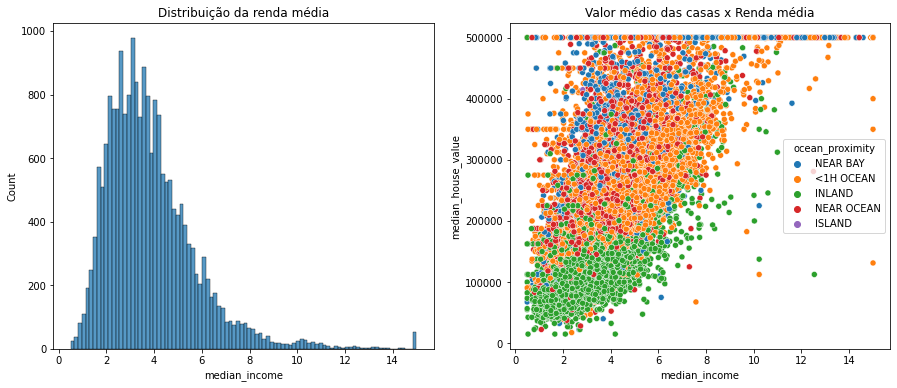

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (15,6))
sns.histplot(data=data, x='median_income', ax=ax[0]).set(title='Distribuição da renda média')
sns.scatterplot(data=data, x='median_income', y='median_house_value', hue='ocean_proximity', ax=ax[1]).set(title='Valor médio das casas x Renda média')
plt.show()

Assim, vamos separar o conjunto de dados em Dados de Treino (train_data) e Dados de Teste (test_data) antes de iniciar as análises, baseando a amostragem na estratificação da renda média (median_income), de forma que a amostra seja significativa do todo.

## 3.2 Amostragem estratificada

Primeiramente, vamos categorizar os valores para a renda média (median_income).

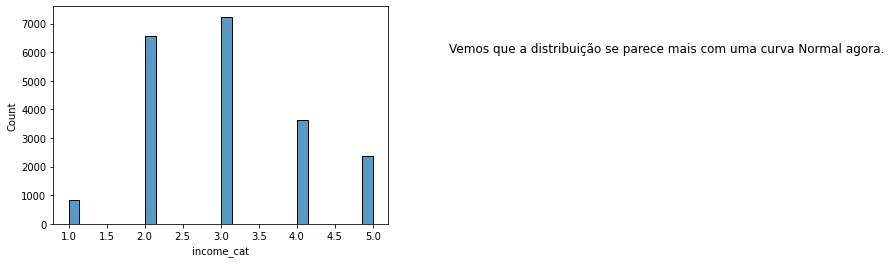

In [ ]:
# 1 - Cria-se uma nova coluna que conterá a categoria de cada renda média (divide-se por 1.5 para reduzir o número de categorias)
data['income_cat'] = np.ceil(data['median_income']/1.5)
# 2 - Vamos criar apenas 5 categorias
data['income_cat'] = data['income_cat'].where(data['income_cat']<5, 5.0)
# 3 - Vamos visualizar o resultado da distribuição da nova coluna
sns.histplot(data=data, x = 'income_cat')

plt.text(6, 6000, 'Vemos que a distribuição se parece mais com uma curva Normal agora.', fontsize=12)
plt.show()

Vamos realizar o split, baseado na coluna 'income_cat', e em seguida, apagá-la.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
    
print(f'Dados de treino:{train_set.shape}')
print(f'Dados de teste:{test_set.shape}')

Dados de treino:(16512, 11)
Dados de teste:(4128, 11)


In [ ]:
train_set.drop(columns=['income_cat'], inplace = True)
test_set.drop(columns=['income_cat'], inplace = True)

<h1>id='processamento'
# 3 Pré-processamento dos dados

Apenas para mostrar os procedimentos que serão realizados, vamos mostrar todas as etapas que serão feitas no pré-processamento.
Em seguida, construiremos o Pipeline que será usado no pré-processamento.

In [ ]:
#Lista de variáveis numéricas
num_var = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income']
num_var

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'median_income']

In [ ]:
#lista de variáveis categóricas
cat_var = ['ocean_proximity']
cat_var


['ocean_proximity']

## 3.1 Variáveis numéricas

Vamos primeiramente substituir os missing values nas variáveis numéricas, pelo valor da média. Neste caso, temos apenas  na coluna 'total_bedrooms'.

In [ ]:
imputer = SimpleImputer(strategy='median')

train_set_num = imputer.fit_transform(train_set[num_var])

train_set_num = pd.DataFrame(train_set_num, columns = num_var)
train_set_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,4.4964


## 3.2 Variáveis categóricas

Vamos transformar a coluna de variáveis categóricas, usando o One Hot Encodder:

In [ ]:
encoder = OneHotEncoder()
train_set_cat = encoder.fit_transform(train_set[cat_var])
train_set_cat = pd.DataFrame(train_set_cat.toarray(), columns=encoder.categories_[0].tolist())
train_set_cat.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


## 3.3 DataFrame preparado

Finalmente, podemos ver abaixo, como será o DataFrame o qual iremos trabalhar, excluindo a coluna 'median_house_value'.

In [ ]:
train_set_prep = pd.concat([train_set_num,train_set_cat], axis=1)
train_set_prep.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,2.1736,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,6.3373,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,2.8750,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,2.2264,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,4.4964,1.0,0.0,0.0,0.0,0.0


# <h1 id='ead'>4 Análise Exploratória dos Dados </h1>

Vamos visualizar a distribuição geográfica dos preços médio das casas.

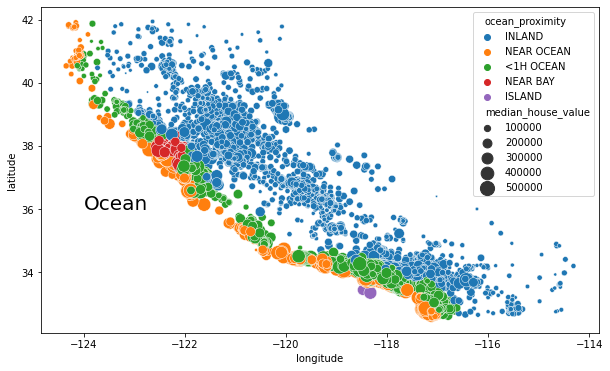

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.scatterplot(data=train_set, x='longitude', y='latitude', alpha=1,
                hue='ocean_proximity',
                size='median_house_value', sizes=(5,200),
               ).text(-124,36,'Ocean',fontsize=20)
plt.show()

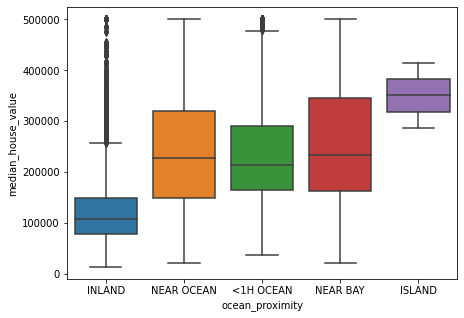

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data = train_set, x = 'ocean_proximity', y='median_house_value')
plt.show()

A partir da visualização do gráfico da distribuição geográfica dos imóveis, podemos ver que os imóveis localizados mais próximos do oceano são os mais caros, confirmado pelo boxplot logo abaixo, onde vemos que a média das casas 'NEAR OCEAN' é levemente mais alta que '<1H OCEAN'

In [ ]:
exp_houses = pd.DataFrame(data['median_house_value'].value_counts()).reset_index()
exp_houses.columns=['valor_casas','quant']
exp_houses.sort_values(by='valor_casas',ascending=False).head()

,valor_casas,quant
0,500001.0,965
30,500000.0,27
3756,499100.0,1
3745,499000.0,1
3433,498800.0,1


Vemos que há quase 1000 casas no nosso conjunto de dados completo cujo valor é igual ou superior a 500000. Vamos ver onde elas estão localizadas:

In [ ]:
exp = data.query('median_house_value>=500000')

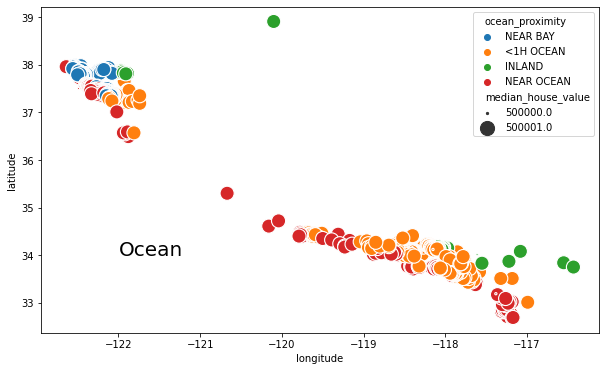

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.scatterplot(data=exp, x='longitude', y='latitude', alpha=1,
                hue='ocean_proximity',
                size='median_house_value', sizes=(5,200),
               ).text(-122,34,'Ocean',fontsize=20)
plt.show()

Confirmamos então que as casas mais caras estão localizadas próximos da costa.

# <h1 id='modelagem'>5 Modelagem </h1>

## 5.1 Preparação dos dados

Vamos realizar novamente o pré-tratamento dos dados, criando um Pipeline.

In [ ]:
X_train = train_set.drop(columns=['median_house_value'])
y_train = train_set['median_house_value']

E fazer as transformações necessárias, as mesmas que foram feitas anteriormente, através do ColumnTransformer.

In [ ]:
#Para as variáveis numéricas:

num_var

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'median_income']

In [ ]:
num_transf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Para as variáveis categóricas:

cat_var = ['ocean_proximity']
cat_transf = Pipeline([
    ('encoder', OneHotEncoder())
])

In [ ]:
#Pipeline de pré-processamento:

preprocessor = ColumnTransformer([
    ('num', num_transf, num_var),
    ('cat', cat_transf, cat_var)
])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_train[0:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236, -0.8936472 ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  1.292168  ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52543365,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ]])

## 5.2 Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_lin = LinearRegression()

Vamos realizar validação cruzada na Regressão Linear:

In [ ]:
lin_scores = cross_val_score(reg_lin, X_train, y_train, scoring='neg_mean_squared_error', cv=10 )
lin_scores_rmse = np.sqrt(-lin_scores)

In [ ]:
print(f'O RMSE é igual a {lin_scores_rmse.mean()}')

O RMSE é igual a 69350.35612654973


## 5.3 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

Vamos realizar a validação cruzada na Decision Tree Regressor:

In [ ]:
dtr_scores = cross_val_score(dtr, X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
print(f'O RMSE é igual a {np.sqrt(-dtr_scores.mean())}')

O RMSE é igual a 69363.0974929635


## 5.4 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rfr_scores = cross_val_score(rfr, X_train,y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
print(f'O RMSE é igual a {np.sqrt(-rfr_scores.mean())}')

O RMSE é igual a 49490.19312255573


# <h1 id='avaliacao'>6 Avaliação no conjunto de testes </h1>

## 6.1 Pré-processamento

In [ ]:
X_test = test_set.drop(columns=['median_house_value'])
y_test = test_set['median_house_value']

In [ ]:
X_test = preprocessor.transform(X_test)
X_test

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

## 6.2 Modelagem

Vamos realizar a modelagem com o modelo que obteve o melhor resultado.

In [ ]:
y_pred = rfr.predict(X_test)

## 6.3 Avaliação do modelo

Vamos agora avaliar o erro RMSE:

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test,y_pred, squared=False)
print(f'O erro RMSE é de {RMSE}')

O erro RMSE é de 47093.616218955416


In [ ]:
rfr.score(X_test,y_test)

0.829833258786007

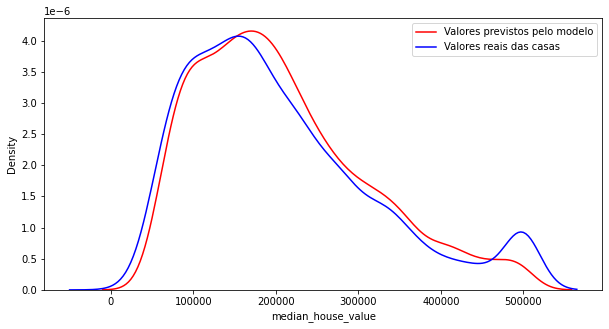

In [ ]:
plt.subplots(figsize=(10,5))
sns.kdeplot(y_pred, color='red')
sns.kdeplot(y_test, color='blue')
plt.legend(['Valores previstos pelo modelo','Valores reais das casas'])
plt.show()

Percebemos que o modelo apresenta erros mais representativos entre os valores de 15000 e 25000, e também ao prever os valores de casas por volta de 500000.

In [ ]:
y_erro = pd.DataFrame({'valor_real':y_test, 'erro':y_pred-y_test})
y_erro[0:5]

,valor_real,erro
5241,500001.0,-18335.42
17352,162500.0,33705.03
3505,204600.0,-6255.00
7777,159700.0,16575.00
14155,184000.0,34280.00


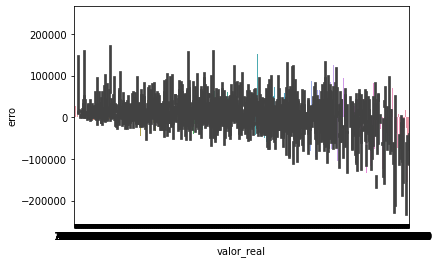

In [ ]:
sns.barplot(data=y_erro,x='valor_real',y='erro')

## 6.4 Feature importance

Vamos verificar quais são as variáveis (colunas) mais importantes para o nosso modelo.

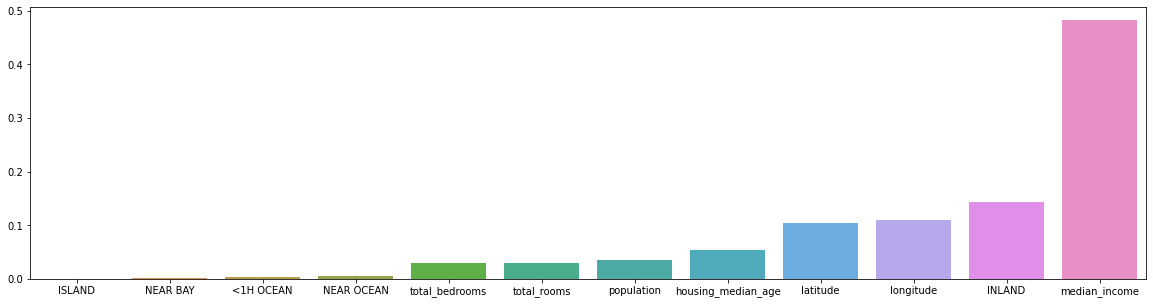

In [ ]:
plt.subplots(figsize=(20,5))
sorted_index = rfr.feature_importances_.argsort()
sns.barplot(x=train_set_prep.columns[sorted_index], y=rfr.feature_importances_[sorted_index])
plt.show()

Vemos que 'median_income' apresenta quase 50% de importância na descrição do modelo, seguido dde 'INLAND'(15%), 'longitude'(13%) e 'latitude'(11%). 
Isto é, **localização** é de fato grande importância para o setor imobiliário.

# <h1 id='conclusao'>7 Conclusão </h1>

O RMSE obtido para os 3 modelos durante o treino, Regressão Linear, Decision Tree Regressor e Randon Forest Regressor, é:

In [ ]:
estimator =[{'Regressão Linear':lin_scores_rmse.mean(), 'Decision Tree Regressor':np.sqrt(-dtr_scores.mean()), 'Randon Forest Regressor':np.sqrt(-rfr_scores.mean())}]
pd.DataFrame(estimator, index=['RMSE']).T

,RMSE
Regressão Linear,69350.356127
Decision Tree Regressor,69834.189149
Randon Forest Regressor,49547.278928


Onde pudemos perceber que o modelo Randon Forest Regressor apresentou o menor RMSE, e portanto foi o modelo escolhido para o teste, que apresentou erro de 47093.61621.

# <h1 id='apendice_A'>Apêndice A </h1>

Construiremos uma função para prever o valor do imóvel a partir das entradas:

In [ ]:
def predizer_valor():
    
    longitude = input('Digite a longitude: ')
    latitude = input('Digite a latitude: ')
    housing_median_age = input('Digite a housing_median_age: ')
    total_rooms = input('Digite a total_rooms: ')
    total_bedrooms = input('Digite a total_bedrooms: ')
    population = input('Digite a households: ')
    households = input('Digite a households: ')
    median_income = input('Digite a median_income: ')
    ocean_proximity = input('Digite a ocean_proximity:')
    
    casa = pd.DataFrame({'longitude':[longitude], 'latitude':[latitude], 'housing_median_age':[housing_median_age], 
                     'total_rooms':[total_rooms],'total_bedrooms':[total_bedrooms], 'population':[population],
                     'households':[households], 'median_income':[median_income], 'ocean_proximity':[ocean_proximity] })
    
    x_casa = preprocessor.transform(casa)
    
    return print(f'O valor da casa é de: {rfr.predict(x_casa)[0]}')
    

Ao executar essa função, será solicitado do usuário que forneça todas as infomações, e em seguida será retornado o valor do imóvel.

In [ ]:
predizer_valor()

# <h1 id='apendice_B'>Apêndice B </h1>

Vamos salvar o modelo para futuro deployment.

In [ ]:
from joblib import dump, load


In [ ]:
dump(rfr, 'RFR_california_houses.joblib') 

['RFR_california_houses.joblib']